# Data

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

# Task

The goal is to predict the 'status' column and determine whether a URL is either legitimate or phising.

All my features are numerical except for the URL column, all my features describe the url's in terms of total length, the number of letters and numbers, etc. So, I will remove the URL column for my prediction data set as the other columns describe the type of url it is well enough on their own.

In [6]:
df1 = df.copy()

In [7]:
df1.drop(columns='url', inplace=True)
df1.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Exploring Data

In [8]:
# Checking for Duplicates
df1.duplicated().sum()

174

In [9]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [10]:
# Checking for Missing Data
# Checking Column Data Types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11256 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11256 non-null  int64  
 1   length_hostname             11256 non-null  int64  
 2   ip                          11256 non-null  int64  
 3   nb_dots                     11256 non-null  int64  
 4   nb_hyphens                  11256 non-null  int64  
 5   nb_at                       11256 non-null  int64  
 6   nb_qm                       11256 non-null  int64  
 7   nb_and                      11256 non-null  int64  
 8   nb_or                       11256 non-null  int64  
 9   nb_eq                       11256 non-null  int64  
 10  nb_underscore               11256 non-null  int64  
 11  nb_tilde                    11256 non-null  int64  
 12  nb_percent                  11256 non-null  int64  
 13  nb_slash                    112

No missing values and all columns are have the correct data types.

# Preprocessing

All my features are numerical, the only thing I need is to do is make a pipeline when instantiating my prediction models and add a `StandardScaler()`

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Ordinal Encoding

My only object column is the 'status' column.

I will set legitimate to 0 and phishing to 1.

In [12]:
df1['status'].value_counts()

legitimate    5715
phishing      5541
Name: status, dtype: int64

In [13]:
df1['status'].replace({'legitimate':0, 'phishing':1}, inplace=True)
df1['status'].value_counts()

0    5715
1    5541
Name: status, dtype: int64

## Validation Split

In [14]:
X = df1.drop(columns='status')
y = df1['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Prediction Models

Prediction Models / Tuner / Validation Split

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Evaluation Metrics

In [16]:
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay,
                             RocCurveDisplay)
import matplotlib.pyplot as plt

## Functions

In [17]:
# Evaluation Function
labels = ['Legitimate', 'Phishing']
def eval(pipe, X, y, pred, label):
    print(f"""++--------------------------++
Classification Report: {label}
++--------------------------++
""")
    
    print(classification_report(y, pred, target_names=labels))

    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    ConfusionMatrixDisplay.from_predictions(y, pred,
    normalize='true', cmap='Reds', ax=axes[0])

    RocCurveDisplay.from_estimator(pipe, X, y, ax=axes[1])
    plt.show()

## Default Models

### KNN

In [18]:
# Model
knn = KNeighborsClassifier()
# Pipeline
knn_pipe = make_pipeline(StandardScaler(), knn)

In [19]:
%%time
# Fit model
knn_pipe.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 17.7 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [20]:
%%time
# Predictions
knn_train = knn_pipe.predict(X_train)
knn_test = knn_pipe.predict(X_test)

CPU times: total: 4.92 s
Wall time: 554 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.96      4237
    Phishing       0.96      0.94      0.95      4205

    accuracy                           0.95      8442
   macro avg       0.95      0.95      0.95      8442
weighted avg       0.95      0.95      0.95      8442



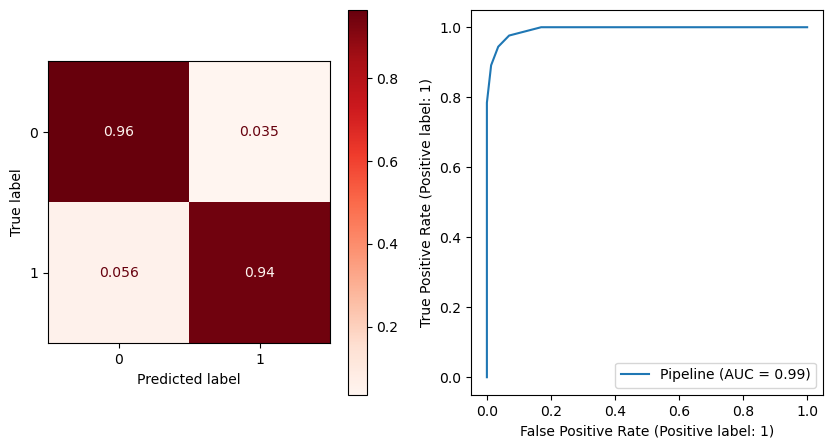

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.93      0.95      0.94      1478
    Phishing       0.95      0.92      0.93      1336

    accuracy                           0.94      2814
   macro avg       0.94      0.94      0.94      2814
weighted avg       0.94      0.94      0.94      2814



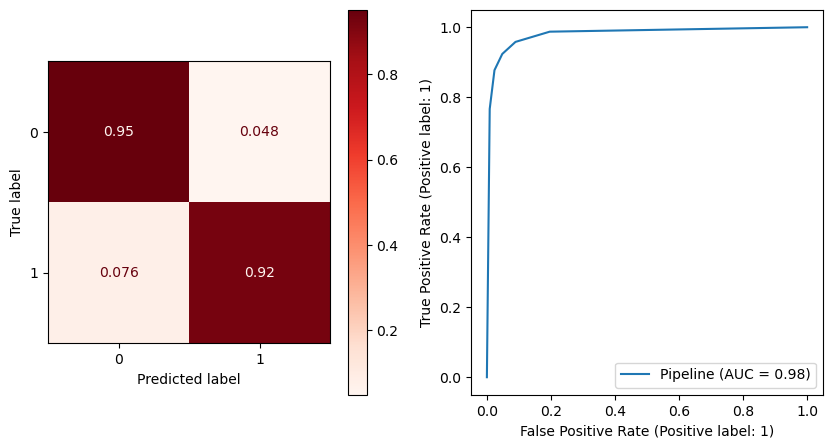

In [21]:
# Evaluation
eval(knn_pipe, X_train, y_train, knn_train, 'Train Data')
eval(knn_pipe, X_test, y_test, knn_test, 'Test Data')

### Logistic Regression

In [22]:
# Model
lr = LogisticRegression(max_iter=1000, random_state=42)
# Pipeline
lr_pipe = make_pipeline(StandardScaler(), lr)

In [23]:
%%time
# Fit
lr_pipe.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 82.5 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [24]:
%%time
# Prediction
lr_train = lr_pipe.predict(X_train)
lr_test = lr_pipe.predict(X_test)

CPU times: total: 0 ns
Wall time: 10.9 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.95      0.95      0.95      4237
    Phishing       0.95      0.95      0.95      4205

    accuracy                           0.95      8442
   macro avg       0.95      0.95      0.95      8442
weighted avg       0.95      0.95      0.95      8442



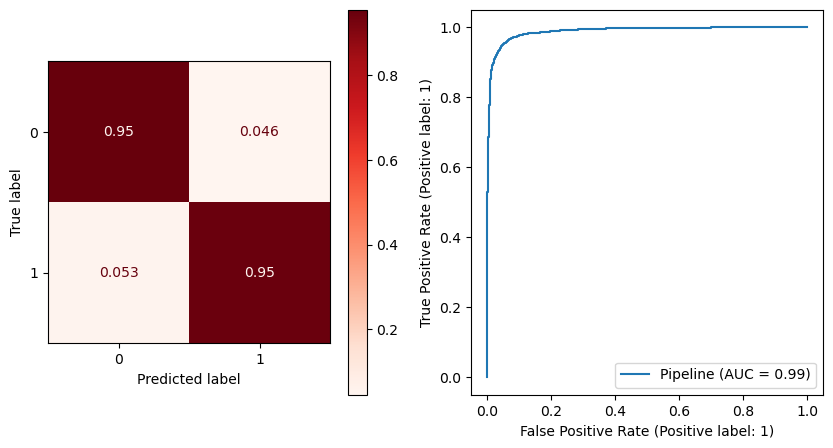

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.94      0.95      0.94      1478
    Phishing       0.94      0.93      0.94      1336

    accuracy                           0.94      2814
   macro avg       0.94      0.94      0.94      2814
weighted avg       0.94      0.94      0.94      2814



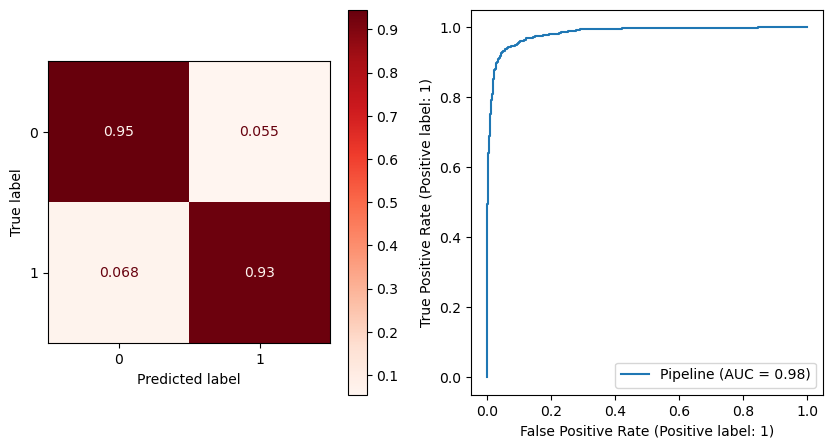

In [25]:
# Evaluation
eval(lr_pipe, X_train, y_train, lr_train, 'Train Data')
eval(lr_pipe, X_test, y_test, lr_test, 'Test Data')

### RandomForest

In [26]:
# Model
rf = RandomForestClassifier(random_state=42)
# Pipeline
rf_pipe = make_pipeline(StandardScaler(), rf)

In [27]:
%%time
# Fit
rf_pipe.fit(X_train, y_train)

CPU times: total: 703 ms
Wall time: 839 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [28]:
%%time
# Predictions
rf_test = rf_pipe.predict(X_test)
rf_train = rf_pipe.predict(X_train)

CPU times: total: 125 ms
Wall time: 112 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      4237
    Phishing       1.00      1.00      1.00      4205

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442



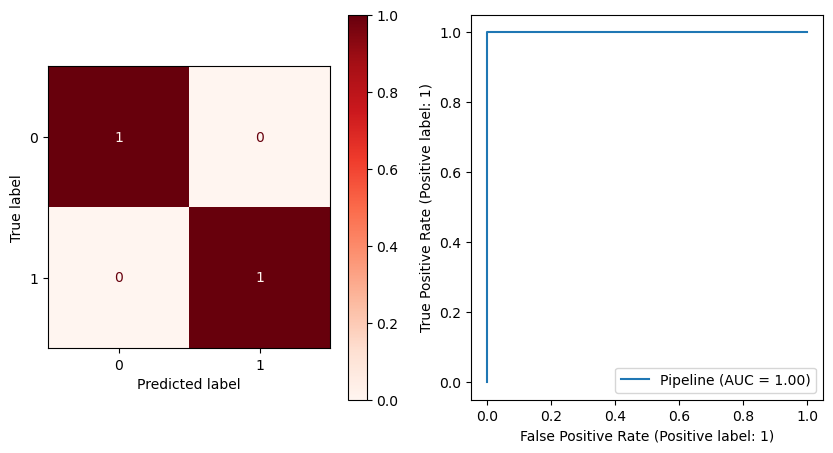

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.97      0.96      0.97      1478
    Phishing       0.96      0.96      0.96      1336

    accuracy                           0.96      2814
   macro avg       0.96      0.96      0.96      2814
weighted avg       0.96      0.96      0.96      2814



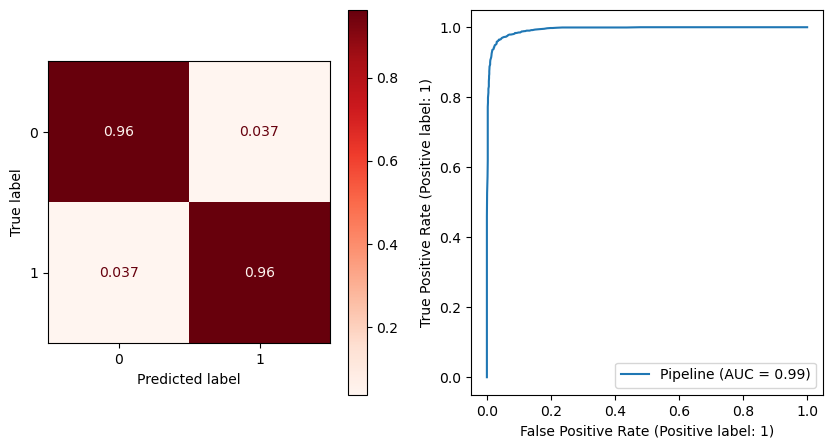

In [29]:
# Evaluations
eval(rf_pipe, X_train, y_train, rf_train, 'Train Data')
eval(rf_pipe, X_test, y_test, rf_test, 'Test Data')

### Conclusion

Looking at the results for the three models:
- RandomForest has the best ROC curve with a AUC of 0.99
- RandomForest has the highest overall accuracy with 96% on the test data and a perfect 100% on the train data based on the classification report
- RandomForest has the highest rate of correct predictions with a 96% for both true negatives and true positives on the test data and a perfect 100% true negatives and true positives on the train data based on the Confusion Matrix.
- LogisticRegression has the fastest prediction time at 48.6 milliseconds total, RandomForest came 2nd at 372 millieseconds total and KNN was the slowest at 3.47 seconds.
- KNN has the fastest fit time at 27.4 milliseconds total, LogisticRegression came 2nd at 963 milliseconds, RandomForest being the slowest at 2.28 seconds.

I have decided to move forward with the RandomForest model, I will tune the parameters and try to find ways to improve it further if possible.

# Changing Model

## RandomForest Tuning

This model already performed really well, not much tuning is required but I shall change certain parameters to see if it will improve the model.

In [30]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfore

In [33]:
# First Attempt
param_grid = {'randomforestclassifier__n_estimators': [50, 75, 100, 125, 150],
              'randomforestclassifier__max_features': ['sqrt', 0.2],
              'randomforestclassifier__min_samples_leaf': [1, 10, 100]}

rf_params = GridSearchCV(rf_pipe, param_grid)
rf_params.fit(X_train, y_train)
rf_params.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 75}

I will leave min_sample_leaf as 1

In [36]:
# Second Attempt
param_grid = {'randomforestclassifier__n_estimators': [25, 35, 45, 55, 65, 75, 85],
              'randomforestclassifier__max_features': ['sqrt', 0.2]}

rf_params = GridSearchCV(rf_pipe, param_grid)
rf_params.fit(X_train, y_train)
rf_params.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 75}

I will use these for the final model

## Final Model

In [37]:
rf_t = RandomForestClassifier(max_features='sqrt', n_estimators=75, random_state=42)

rf_t_pipe = make_pipeline(StandardScaler(), rf_t)

In [38]:
%%time
# Fit
rf_t_pipe.fit(X_train, y_train)

CPU times: total: 578 ms
Wall time: 607 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=75, random_state=42))])

In [39]:
%%time
# Predict
rf_t_train = rf_t_pipe.predict(X_train)
rf_t_test = rf_t_pipe.predict(X_test)

CPU times: total: 78.1 ms
Wall time: 89.6 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      4237
    Phishing       1.00      1.00      1.00      4205

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442



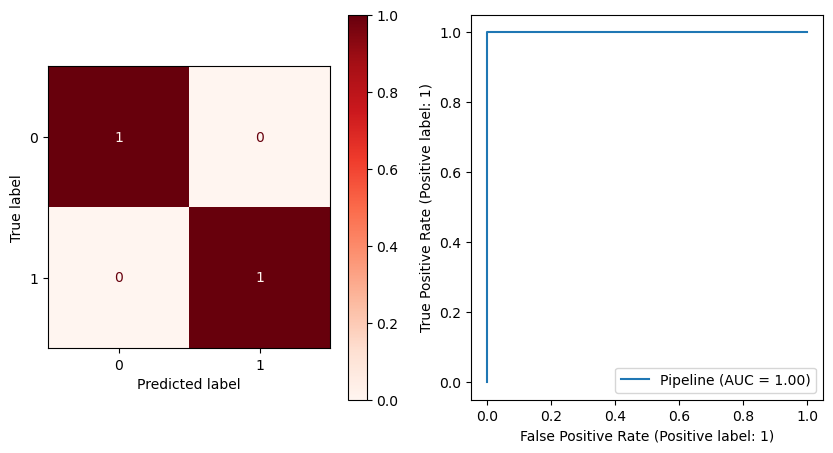

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.97      0.96      0.96      1478
    Phishing       0.95      0.96      0.96      1336

    accuracy                           0.96      2814
   macro avg       0.96      0.96      0.96      2814
weighted avg       0.96      0.96      0.96      2814



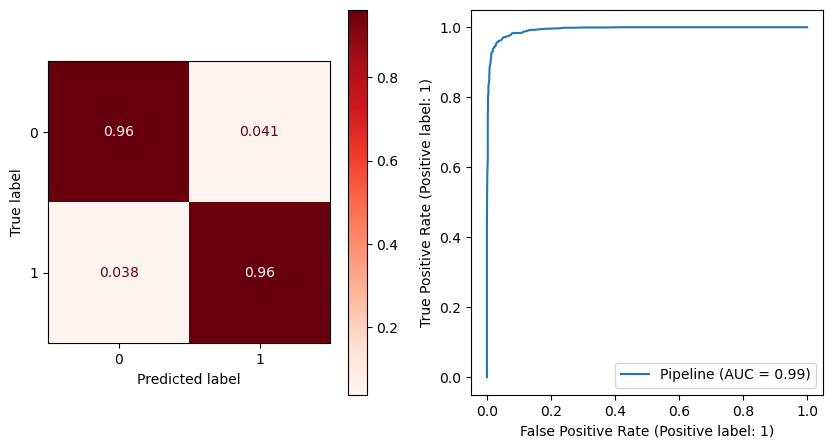

In [40]:
eval(rf_t_pipe, X_train, y_train, rf_t_train, 'Train Data')
eval(rf_t_pipe, X_test, y_test, rf_t_test, 'Test Data')

Very small changes, only visible in the number of false positives that increased from 0.037 to 0.041 and the number of false negatives also increased from 0.037 to 0.038.

With the changes, the fit time decreased from 2.28 seconds total to 1.22 seconds total. The prediction time also decreased with the changes from 372 milliseconds total, to 208 milliseconds total.

Considering how small the increase in false negatives and false positives is, due to the faster fit and prediction times the tuned model overall performed better.

I recommend the tuned RandomForest model as my final model that best works with this data set to predict whether a url is legitimate or phishing.

# Changing Data

Seeing how tuning the model decreased the fit and predict times with extremely minimal downside of an increase in false negatives/positives of about ~0.003, I will now attempt changing the data itself to see if I can reduce the time even further and possibly increase prediction results.

## PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
# I will try two version of PCA to see which one works better
# 95% explained variance
pca95 = PCA(n_components=0.95)
# 90 explained variance
pca90 = PCA(n_components=0.90)

In [43]:
# PCA Pipes
pca95_p = make_pipeline(StandardScaler(), pca95)
pca90_p = make_pipeline(StandardScaler(), pca90)

In [44]:
# Transforming Data
train_pca90 = pca90_p.fit_transform(X_train)
test_pca90 = pca90_p.transform(X_test)

train_pca95 = pca95_p.fit_transform(X_train)
test_pca95 = pca95_p.transform(X_test)

Check the shape to see how PCA reduced the features.

In [45]:
X_train.shape

(8442, 87)

In [46]:
train_pca95.shape

(8442, 60)

In [47]:
train_pca90.shape

(8442, 52)

### PCA at 95% Explained Variance

In [48]:
%%time
# Fit
rf_t.fit(train_pca95, y_train)

CPU times: total: 2.39 s
Wall time: 2.45 s


RandomForestClassifier(n_estimators=75, random_state=42)

In [49]:
%%time
# Predict
pca95_train_pred = rf_t.predict(train_pca95)
pca95_test_pred = rf_t.predict(test_pca95)

CPU times: total: 62.5 ms
Wall time: 73.7 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      4237
    Phishing       1.00      1.00      1.00      4205

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442



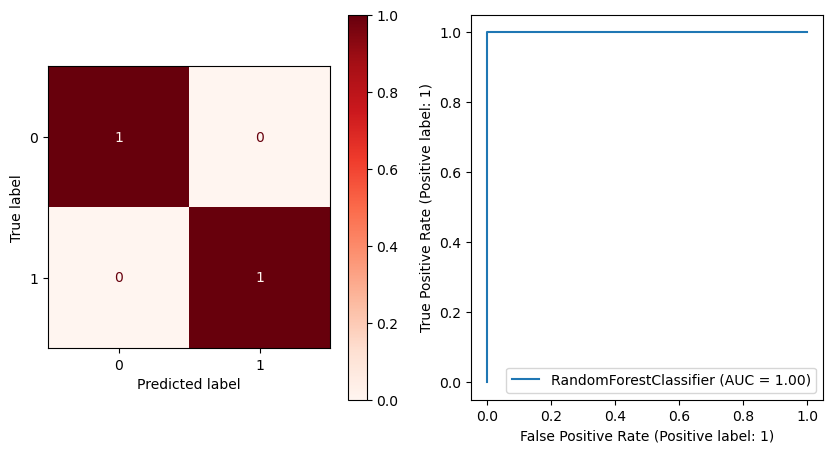

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.96      0.94      0.95      1478
    Phishing       0.93      0.95      0.94      1336

    accuracy                           0.94      2814
   macro avg       0.94      0.95      0.94      2814
weighted avg       0.95      0.94      0.94      2814



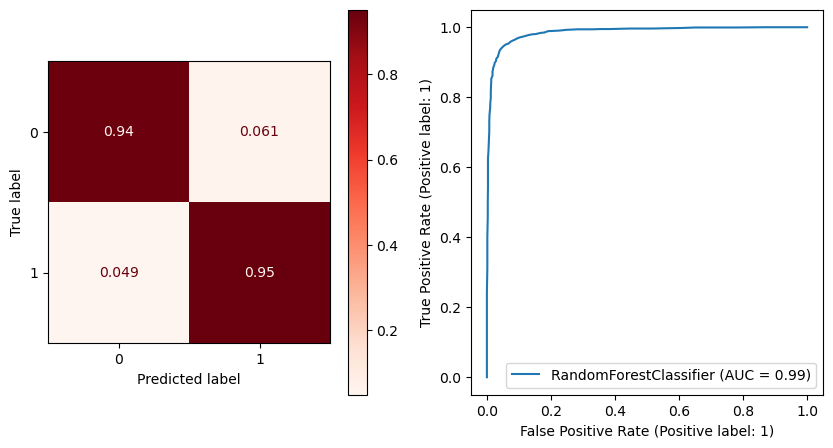

In [50]:
eval(rf_t, train_pca95, y_train, pca95_train_pred, 'Train Data')
eval(rf_t, test_pca95, y_test, pca95_test_pred, 'Test Data')

### PCA at 90% Explained Variance

In [51]:
%%time
# Fit
rf_t.fit(train_pca90, y_train)

CPU times: total: 2.31 s
Wall time: 2.4 s


RandomForestClassifier(n_estimators=75, random_state=42)

In [52]:
%%time
# Predict
pca90_test_pred = rf_t.predict(test_pca90)
pca90_train_pred = rf_t.predict(train_pca90)

CPU times: total: 62.5 ms
Wall time: 83.4 ms


++--------------------------++
Classification Report: Train Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      4237
    Phishing       1.00      1.00      1.00      4205

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442



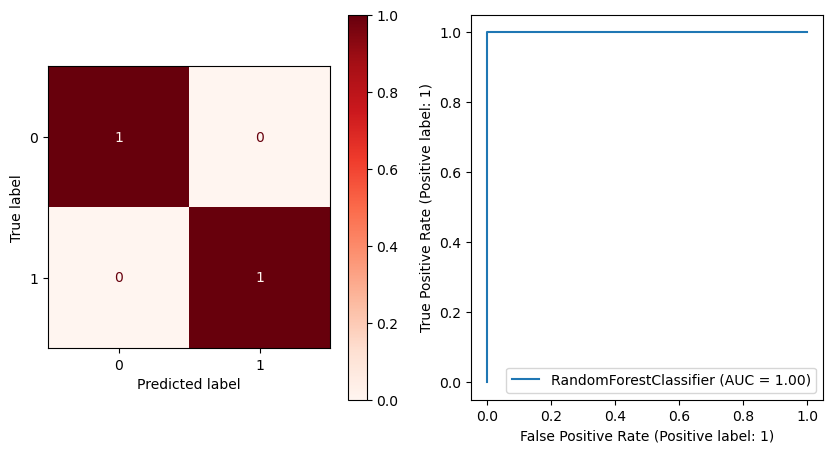

++--------------------------++
Classification Report: Test Data
++--------------------------++

              precision    recall  f1-score   support

  Legitimate       0.95      0.94      0.95      1478
    Phishing       0.93      0.95      0.94      1336

    accuracy                           0.94      2814
   macro avg       0.94      0.94      0.94      2814
weighted avg       0.94      0.94      0.94      2814



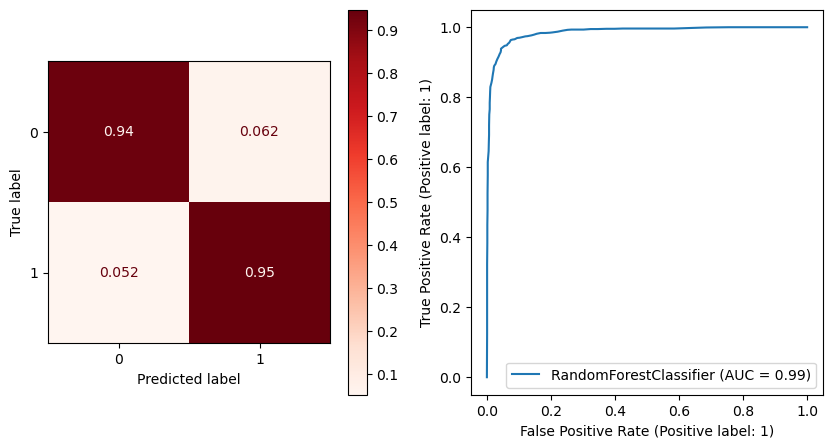

In [53]:
eval(rf_t, train_pca90, y_train, pca90_train_pred, 'Train Data')
eval(rf_t, test_pca90, y_test, pca90_test_pred, 'Test Data')

## Conclusion

PCA at 95% Explained Variance
___
Fit time: 4.88 seconds total

Predict time: 229 milliseconds total

On the training data we get the same results of a perfect score on all metrics.

On the test data the overall accuracy fell from 96% to 94%, the model with PCA us worse at prediction. The RocCurve is the same but the ConfusionMatrix shows that the true positives and true negatives fell from 96% for both to 94% true negatives and 95% true positives. Not using PCA is better for more accurate predictions. Not even the times are better as this was the metric PCA should have improved the most but did not.

PCA at 90% Explained Variance
___
Fit time: 4.86 seconds total

Predict time: 230 milliseconds total

On the training data, we get the same results as the original data.

On the test data, we see identical metrics as PCA at 95% variance, the PCA method was not useful in improving our model for this data.

I recommend using the final tuned RandomForest model without PCA for best results